**Test file**

In [15]:
#imports

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern



**Image with polygon and label**

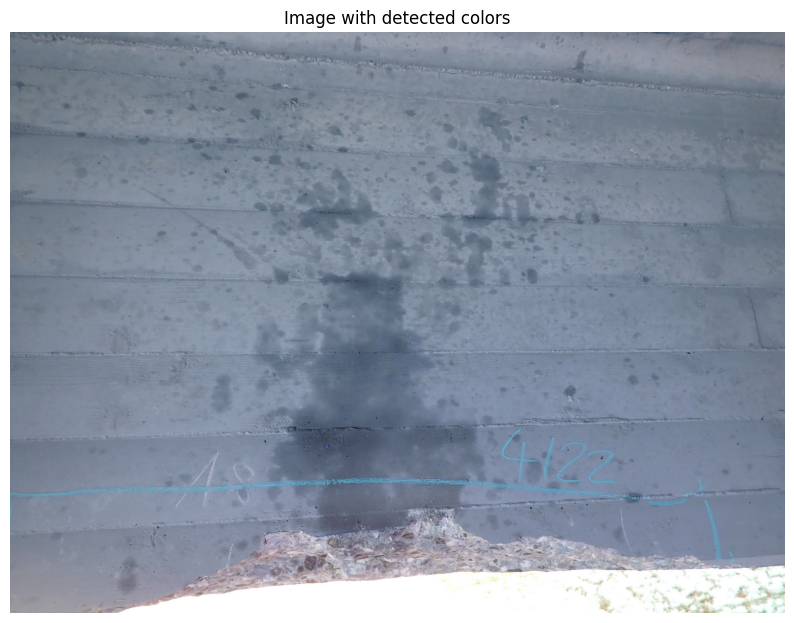

In [3]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0051.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grey_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Print image:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title("Image with detected colors")
plt.axis('off')
plt.show()

**Create image with overlay polygons**

[{'label': 'Hollowareas', 'points': [[2455.0, 1891.0], [2456.0, 1891.0], [2662.0, 1923.0], [2817.0, 1903.0], [2820.0, 1903.0], [2883.0, 1908.0], [2889.0, 1909.0], [2897.0, 1917.0], [2898.0, 1921.0], [2941.0, 2160.0], [3116.0, 2183.0], [3121.0, 2185.0], [3126.0, 2188.0], [3129.0, 2193.0], [3130.0, 2201.0], [3128.0, 2215.0], [3126.0, 2221.0], [3123.0, 2225.0], [3118.0, 2228.0], [3112.0, 2229.0], [2333.0, 2238.0], [1877.0, 2253.0], [988.0, 2316.0], [645.0, 2365.0], [491.0, 2397.0], [488.0, 2397.0], [12.0, 2400.0], [7.0, 2399.0], [2.0, 2396.0], [-2.0, 2392.0], [-4.0, 2384.0], [-12.0, 1904.0], [-11.0, 1899.0], [-8.0, 1894.0], [-4.0, 1890.0], [3.0, 1888.0], [498.0, 1871.0], [958.0, 1863.0], [1553.0, 1843.0], [1853.0, 1841.0], [1855.0, 1841.0]], 'shape_type': 'polygon'}, {'label': 'WConccor', 'points': [[532.0, 2379.5], [489.5, 2377.0], [587.0, 2344.5], [782.0, 2252.0], [1014.5, 2167.0], [1047.0, 2082.0], [1124.5, 2059.5], [1237.0, 2067.0], [1317.0, 2077.0], [1637.0, 2047.0], [1652.0, 1997.0]

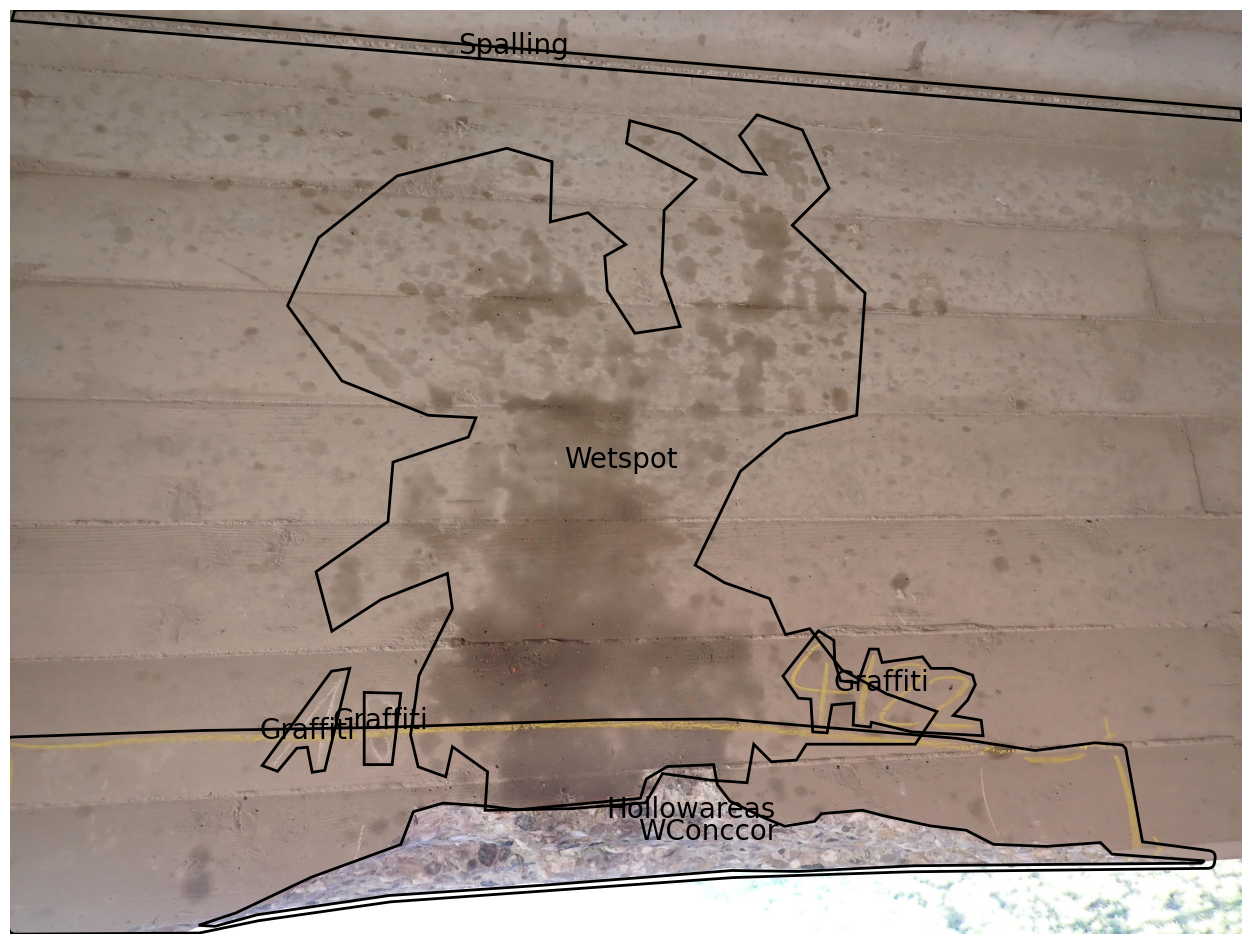

In [4]:
# Imports:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from PIL import Image

# Image number:
image_number_string = "0051"

# Read in image: 
path = "data/dacl10k_v2_devphase/images/train/"
file = f"dacl10k_v2_train_{image_number_string}.jpg"
image_path = path + file
image = Image.open(image_path).convert('RGB')

# Read in corresponding annotations: 
path = "data/dacl10k_v2_devphase/annotations/train/"
file = f"dacl10k_v2_train_{image_number_string}.json"
annotations_path = path + file
with open(annotations_path, 'r') as file:
    annotations = json.load(file)
shapes = annotations["shapes"]
print(shapes)

# Draw image with polygons: 
fig, ax = plt.subplots(1, figsize=(20,12))
ax.imshow(image)
print(shapes)
for polygon in shapes:
    points = polygon['points']
    print(points)
    label = polygon['label']
    polygon = patches.Polygon(points, closed=True, edgecolor='black', fill=False, linewidth=2, label=label)
    ax.add_patch(polygon)
    centroid_x = sum([point[0] for point in points]) / len(points)
    centroid_y = sum([point[1] for point in points]) / len(points)
    ax.text(centroid_x, centroid_y, label, color='black', fontsize=20, ha='center')
plt.axis('off')
plt.show()



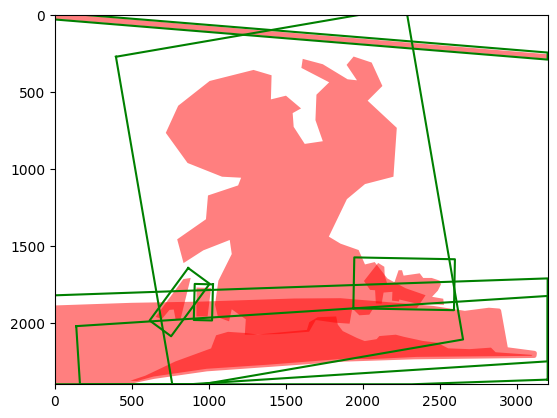

In [5]:
from shapely.geometry import Polygon, box
from shapely.affinity import scale, affine_transform

data = annotations
image_width = data["imageWidth"]
image_height = data["imageHeight"]
image_bounds = box(0, 0, image_width, image_height)
scaling = 1.25

fig, ax = plt.subplots()
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)
ax.set_aspect('equal')

for shape in data['shapes']:
    polygon = Polygon(shape['points'])
    min_rect = polygon.minimum_rotated_rectangle
    rect_center = min_rect.centroid
    scaled_rect = scale(min_rect, xfact=scaling, yfact=scaling, origin=rect_center)

    clipped_rect = scaled_rect.intersection(image_bounds)

    # Plotting the polygon
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='r', ec='none')

    # Plotting the minimum area rectangle
    x, y = clipped_rect.exterior.xy
    ax.plot(x, y, 'g')

plt.gca().invert_yaxis()  # Invert Y axis to match image coordinate system
plt.show()

In [6]:
#eventuell löschen

def scale_polygon(points, scale=1.25):
    points = np.array(points)
    centroid = np.mean(points, axis = 0)
    scaled_points = np.array([(p - centroid) * scale + centroid for p in points])
    #scaled_points = np.array([(p - centroid) + centroid for p in points])
    return scaled_points.astype(np.int32)

def extract_polygon_area(image, polygon_points):
# Scale the polygon points
    scaled_polygon = scale_polygon(np.array(points), 1.25)
    
    # Create a mask with the same dimensions as the image, initially all zeros (black)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    # Fill the polygon in the mask with white
    cv2.fillPoly(mask, [scaled_polygon], 255)
    
    # Extract the area of the image corresponding to the mask
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return result

points = shapes[0]["points"]
extracted = extract_polygon_area(image_copy, points)
plt.imshow(extracted)


NameError: name 'image_copy' is not defined

In [7]:
#function to plot image with given polygons
def plot_picture_with_polygons(image, polygons):
    fig, ax = plt.subplots(1, figsize=(20,12))
    ax.imshow(image)
    for polygon in polygons:
        points = polygon
        polygon = patches.Polygon(points, closed=True, edgecolor='red', fill=False, linewidth=2, label=label)
        ax.add_patch(polygon)
    plt.show()

# extract features

In [8]:
image_copy = np.copy(image)

In [9]:
#function to calculate the overlapping percentage of a defect polygon with feature polygons
def calculate_overlapping_percentage(defect_polygon, feature_polygons):
    overlapping_quotient = []
    defect_polygon = Polygon(defect_polygon)
    overlapping_area = 0
    for feature_polygon in feature_polygons:
        if len(feature_polygon) > 3:
            feature_polygon = Polygon(feature_polygon)
            try:
                overlapping_area += defect_polygon.intersection(feature_polygon).area
            except:
                pass
    quotient = overlapping_area / defect_polygon.area
    return round(quotient, 4)

### find darker areas

In [10]:
def find_darker_areas(image, threshold=100):
    # Convert image to grayscale:
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Find dark areas:
    dark_areas = grey_image < threshold
    dark_areas = dark_areas.astype(np.uint8)
    blurred = cv2.blur(dark_areas, (15, 15), 0)
    plt.imshow(blurred)
    contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        points = []
        for point in contour:
            points.append(*point.tolist())
        polygons.append(points)

    return blurred, polygons

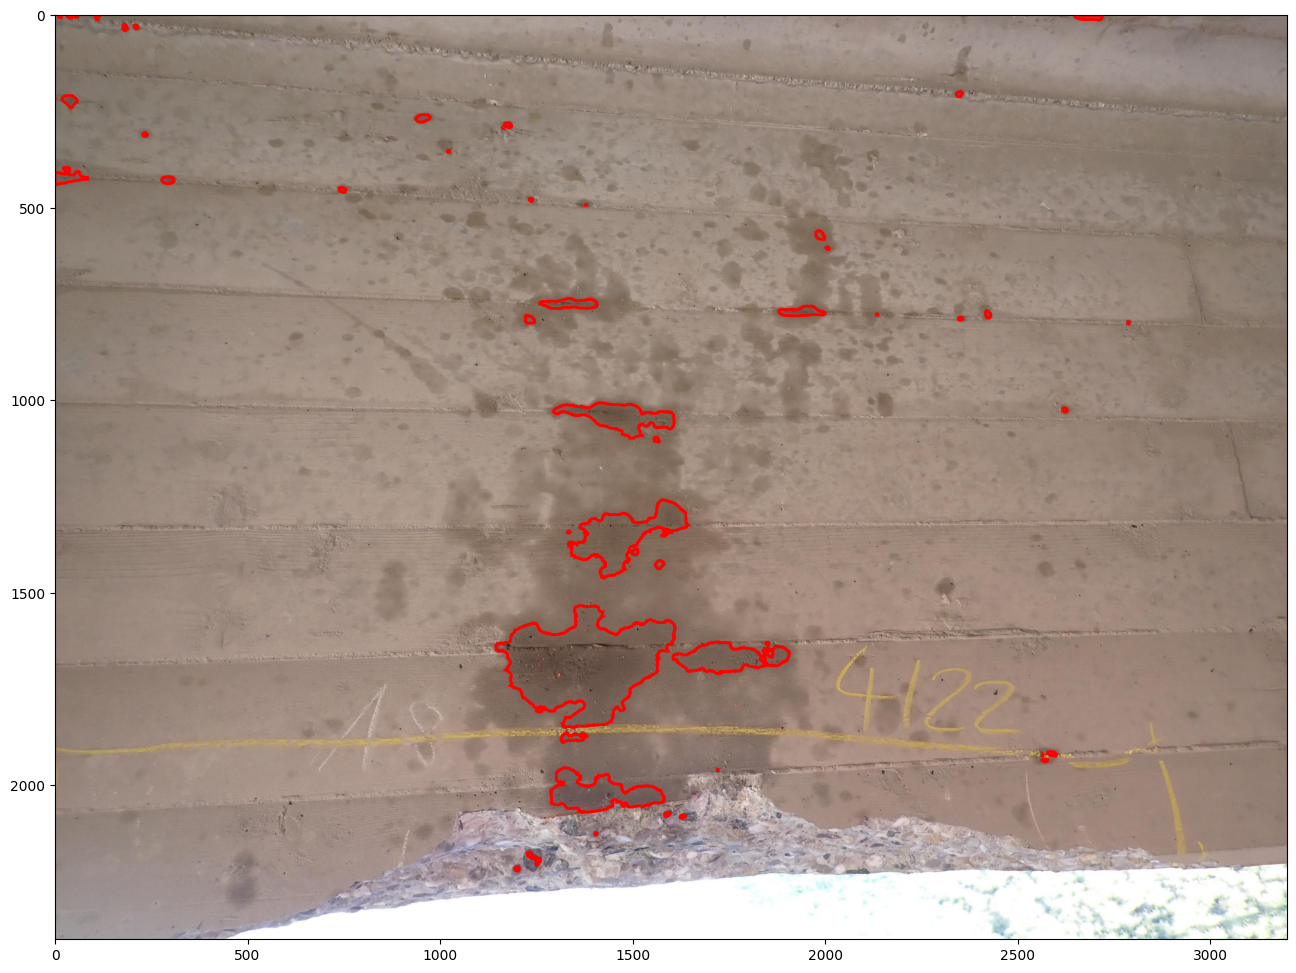

In [13]:
plot_picture_with_polygons(image_copy, dark_polygons)

0.0053


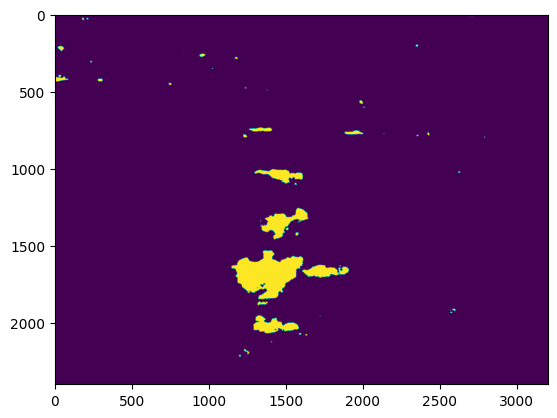

In [12]:
dark_areas, dark_polygons = find_darker_areas(image_copy, threshold=100)
defect_polygons = shapes[5]["points"]
overlap = calculate_overlapping_percentage(defect_polygons, dark_polygons)
print(overlap)

### find reddish brown areas

In [11]:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0051.jpg"
image_path = path + file
image_for_color_detector = cv2.imread(image_path, cv2.IMREAD_COLOR)



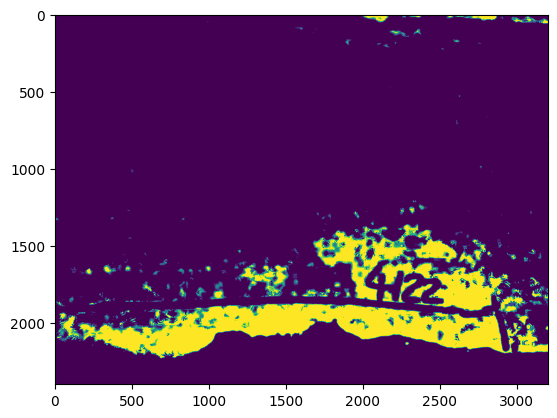

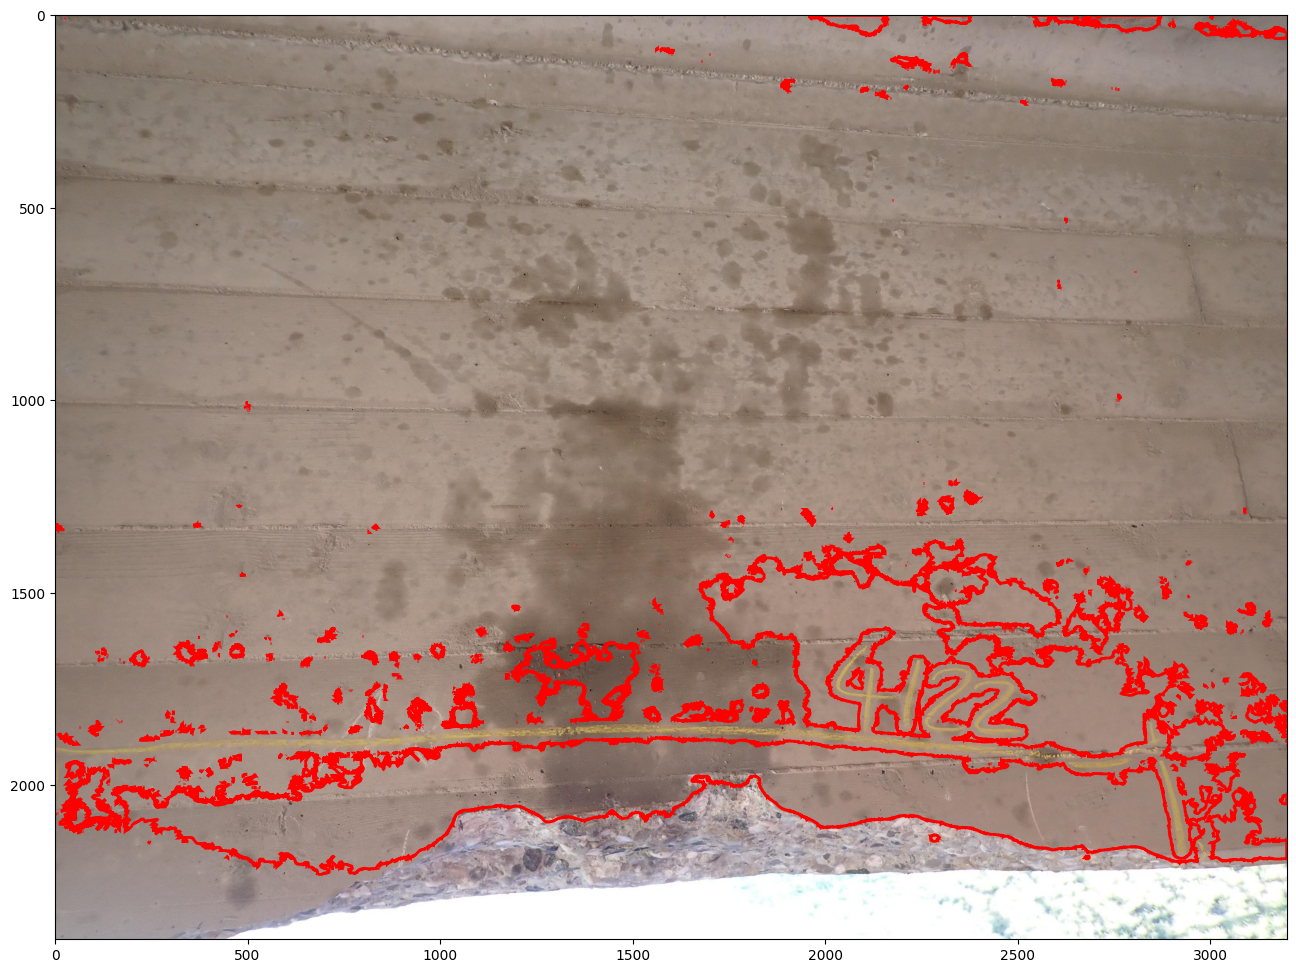

In [84]:
def find_reddish_areas(image):

    def color_detector(image, lower_bounds: list, upper_bounds: list) -> list:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
        for lower_bound, upper_bound in zip(lower_bounds, upper_bounds):
            lower_bound = np.array(lower_bound)
            upper_bound = np.array(upper_bound)
            mask += cv2.inRange(hsv_image, lower_bound, upper_bound)
        return mask

    rusty_lower_bounds = [[0, 40, 50], [170, 40, 50]]
    rusty_upper_bounds = [[10, 255, 200], [180, 255, 200]]
    blurred = cv2.blur(image, (30, 30), 0)
    reddish_areas = color_detector(blurred, rusty_lower_bounds, rusty_upper_bounds)
    plt.imshow(reddish_areas)
    contours, _ = cv2.findContours(reddish_areas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        points = []
        for point in contour:
            points.append(*point.tolist())
        polygons.append(points)

    return image, polygons

reddish, reddish_polygons = find_reddish_areas(image_for_color_detector)
plot_picture_with_polygons(image_copy, reddish_polygons)

In [13]:
defect_polygons = shapes[0]["points"]
overlap = calculate_overlapping_percentage(defect_polygons, reddish_polygons)
print(overlap)

0.3926


### find high entropy areas

191


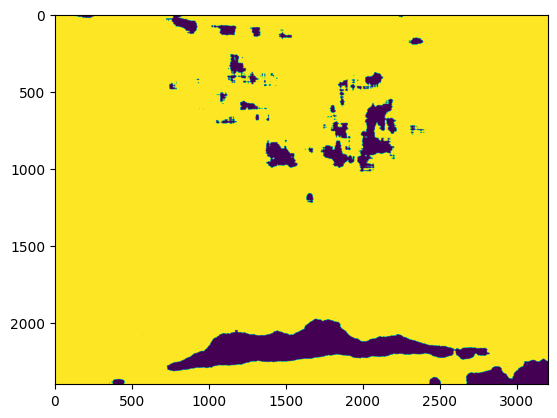

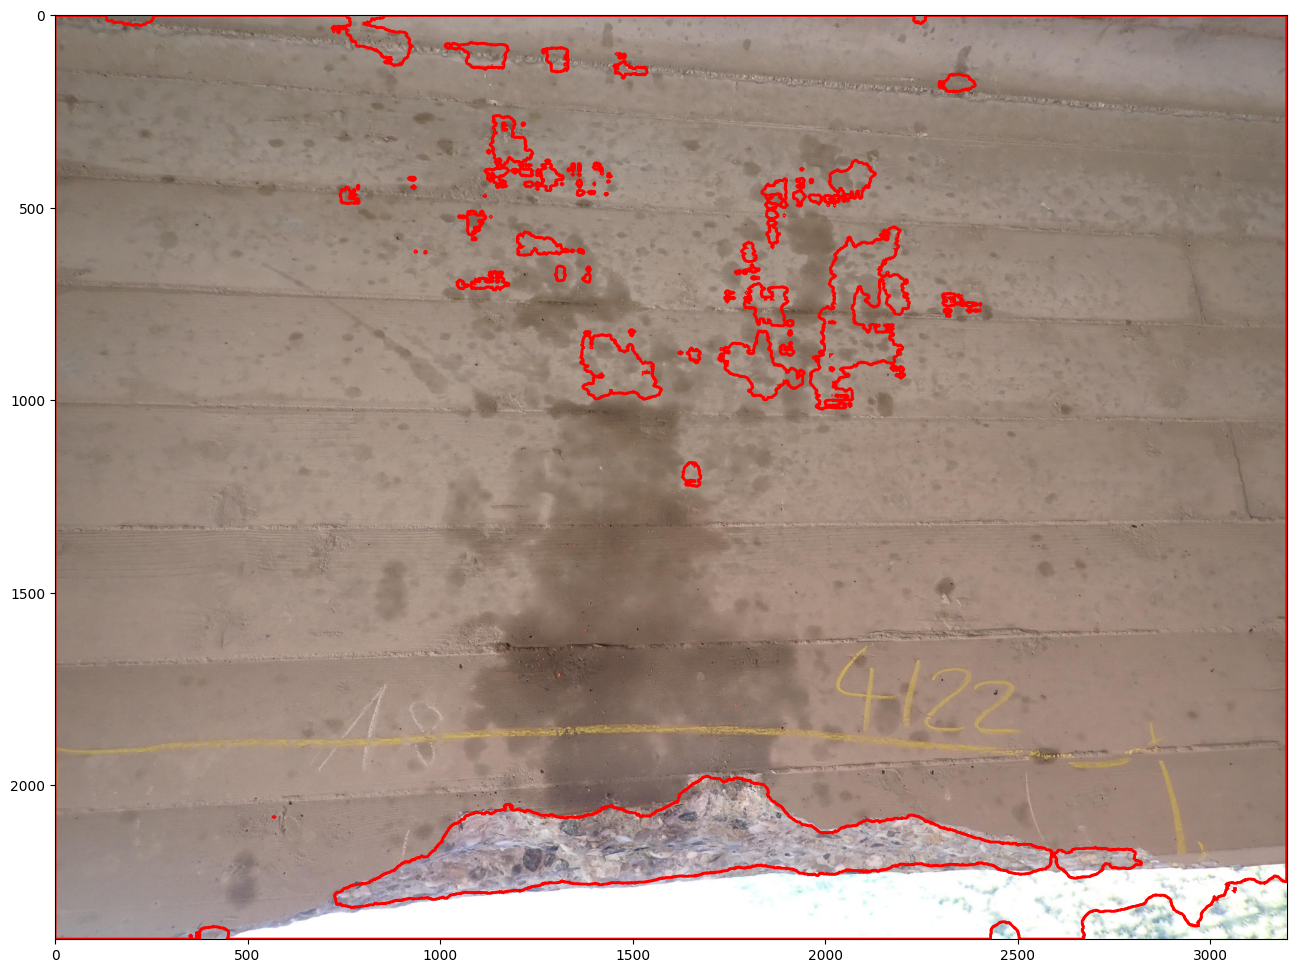

In [14]:
def find_rough_texture(image, threshold=8):

    #read in image as greyscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply local binary pattern
    lbp = local_binary_pattern(image, P=8, R=2, method='uniform')

    # normlaize and convert to uint8, then blur
    lbp_uint8 = np.uint8((lbp / lbp.max())*255)
    
    blurred = cv2.blur(lbp_uint8, (5, 5), 0)
    mean = np.mean(blurred)
    std = np.std(blurred)
    median = np.median(blurred)
    #apply thresholding
    _, binary_image = cv2.threshold(blurred, mean - std, 255, cv2.THRESH_BINARY)  

    binary_blurred = cv2.blur(binary_image, (100, 100), 0)
    mean = np.mean(binary_blurred)
    std = np.std(binary_blurred)
    #apply thresholding
    _, binary_image = cv2.threshold(binary_blurred, mean - 1.5 * std, 255, cv2.THRESH_BINARY) 
    plt.imshow(binary_image)
    
    # Uncomment and adjust the contour finding and polygon processing as needed
    
    contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        points = []
        for point in contour:
            points.append(*point.tolist())
        polygons.append(points)

    print(len(polygons))
    return lbp, polygons

    #return 100, 200  # Adjust return values as needed based on your uncommented processing

rough, rough_polygons = find_rough_texture(image_copy)
plot_picture_with_polygons(image_copy, rough_polygons)